<a href="https://colab.research.google.com/github/luiggix/PAPIME_PE101019_Materiales/blob/master/01_Calculo/Continuidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import sympify, lambdify


# Continuidad

## Proyecto PAPIME PE101019

*   Autores: 
    - José de Jesús Tapia López
    - Luis M. de la Cruz Salas
*   Rev: lun ago 19 15:27:40 CDT 2020

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gutils as vis
%matplotlib inline

# Emprendiendo con Chilaquiles 2.0

Una vez terminado el semestre, aquellos estudiantes que emprendieron con la venta de Chilaquiles, decidieron continuar con sus ventas durante el periodo intersemestral vendiendo durante más días a la semana. La tabla de ventas para las diferentes semanas se muestra a continuación:

| Semana | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 12 | 13 | 14 | 15 | 16 | 17 | 18 | 19 | 20 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Porciones vendidas | 4 | 9 | 18 | 30 | 43 | 52 | 57 | 59 | 60 | 60 | 60 | 60 | 132 | 134 | 137 | 141 | 145 | 150 | 157 | 165 | 175 |

Hagamos una gráfica de estos datos:

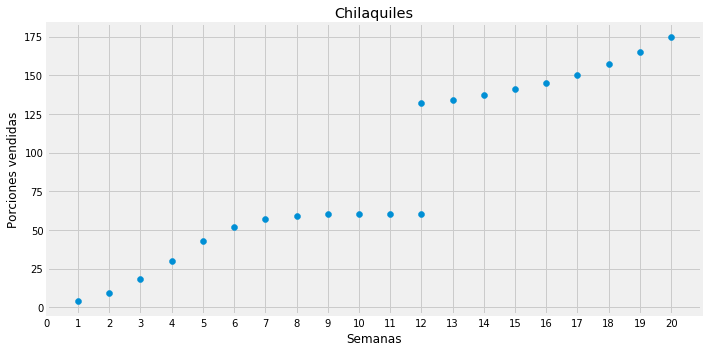

In [3]:
semanas   = [ 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12, 12, 13, 14, 15, 16, 17, 18, 19, 20]
porciones = [ 4, 9,18,30,43,52,57,59,60,60,60,60,132, 134, 137, 141, 145, 150, 157, 165, 175]

par = [{'title':'Chilaquiles', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]
graf = vis.planoCartesiano(par=par)
graf.scatter(x=semanas, y=porciones)
#graf.plot(x = [12, 12], y=[0, 175], par={'ls':'--', 'lw':2, 'color':'green'})
graf.ticks(xticks = [i for i in range(21)])
graf.show()

Si observas con atención, notarás que en la semana 12 se tienen dos valores: 60 y 132. Esto se nota mejor cuando se traza una línea vertical en esa semana. Para ver esta línea, solo elimina el signo `#` en la línea de código `#graf.plot(...)` de la celda anterior y ejecuta nuevamente. ¿Esta gráfica cumple con al definición de función?

**¿Qué fue lo que pasó con la venta de chilaquiles en la semana 12? ¿Por qué hay dos valores?**

Revisando esta información uno de los estudiantes comenta que el registró el primer valor de 60, debido a que solo tomó en cuenta la venta hasta media semana, que fue cuando terminaron sus exámenes de Cálculo. Pero los otros dos estudiantes, continuaron las ventas hasta el final de esa misma semana y registraron el total de 132 para la misma semana. Obviamente hay un conflicto debido a que se tienen dos valores para la misma semana y eso se observa en la gráfica. Por supuesto es fácil ponerse de acuerdo en este caso y registrar un solo valor, pero tomemos este ejemplo como un caso de estudio de funciones continuas y discontinuas.

Anteriormente habíamos observado que las ventas se podían modelar con una función logística, al menos hasta la semana 12. Ahora tenemos información hasta la semana 20, pero parece que el comportamiento de las ventas es diferente, del tipo exponencial. Veamos la siguiente gráfica:

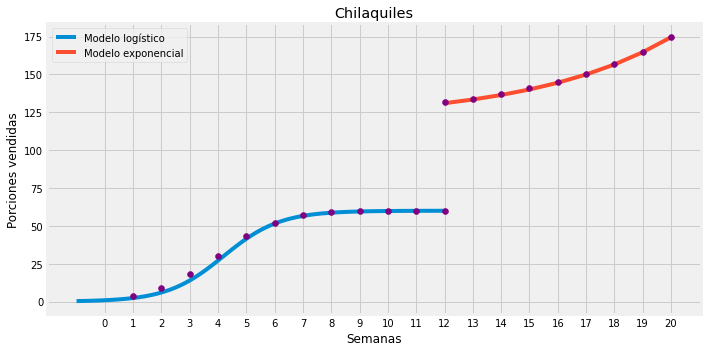

In [67]:
def chiexponenciales(a, x):
    return np.exp(a*x)+120

def chilogisticos(a,b,c,x):
    return a / (b + np.exp(-1*(x-c)))

par = [{'title':'Chilaquiles', 
        'xlabel':'Semanas',
        'ylabel':'Porciones vendidas'}]
graf = vis.planoCartesiano(par=par)

xl = np.linspace(-1,12,100)       # Dominio: función logísitica   
yl = chilogisticos(30,0.5,3.5,xl) # Codominio  
graf.plot(x=xl, y=yl, par={'label':'Modelo logístico'})

xe = np.linspace(12,20,9)     # Dominio: función exponencial
ye=chiexponenciales(0.2, xe)  # Codominio
graf.plot(x=xe, y=ye, par={'label':'Modelo exponencial'})

graf.scatter(x=semanas, y=porciones, par={'color':'purple', 'zorder':5})
#graf.plot(x = [12, 12], y=[0, 175], par={'ls':'--', 'lw':2, 'color':'green'})
graf.ticks(xticks = [i for i in range(21)])
graf.legend()
graf.show()

Observamos que efectivamente los modelos logístico y exponencial ajustan muy bien las ventas durante el semestre y durante el periodo intersemestral, respectivamente. Si los estudiantes emprendedores quisieran modelar el comportamiento de las ventas para todas las semanas deberían escribir de manera formal lo siguiente:

$ f(x) = \left\{
\begin{array}{l}
      \frac{30}{0.5 + e^{-(x-3.5)}} & x \leq 12 \\
      \\
      e^{0.2 x} + 120 & x \geq 12 \\
\end{array} 
\right.$

**Algunas conclusiones**:

- La definición de $f(x)$ escrita antes no cumple con la definición de función, pues se tienen dos valores de $f$ para $x=12$:
    - Si caminamos por la gráfica desde la semana 1 hasta la 12, llegaremos al valor de $f(x=12) = 60$. 
    - Pero si caminamos en reversa, empezando en la semana 20, veremos que en la semana 12 obtenemos el valor de $f(x=12) = 132$. 
    - Decimos que hay un **salto** o **discontinuidad** en ese punto y por lo tanto la función completa $f(x)$ no es continua.

- Sin embargo, podemos definir una *función continua a trozos*:
    - Supongamos que los estudiantes acuerdan que la semana 12 pertenece al periodo intersemestral, por lo tanto tenemos:
        - una función del tipo logístico, con un dominio $x \in [0,12)$ y
        - una función del tipo exponencial, con un dominio $x \in [12, 20]$ 
    - de manera formal escribimos:

$ f(x) = \left\{
\begin{array}{l}
      \frac{30}{0.5 + e^{-(x-3.5)}} & x < 12 \qquad \text{(logística hasta la semana 11)} \\
      \\
      e^{0.2 x} + 120 & x \geq 12 \qquad \text{(exponencial apartir de la semana 12)}\\
\end{array} 
\right.$

Observe que en esta definición los dominios no se traslapan, por lo que ahora si se cumple la definición de función. 

A continuación veremos más ejemplos de funciones continuas y discontinuas, así como algunas definiciones más formales.

## Ejemplos y formalismos matemáticos

### Ejemplo 1.

Considerese la siguiente función: $f(x) = \frac{1}{x}$.  ¿Qué pasa cuando $x$ está cerca del valor cero?.

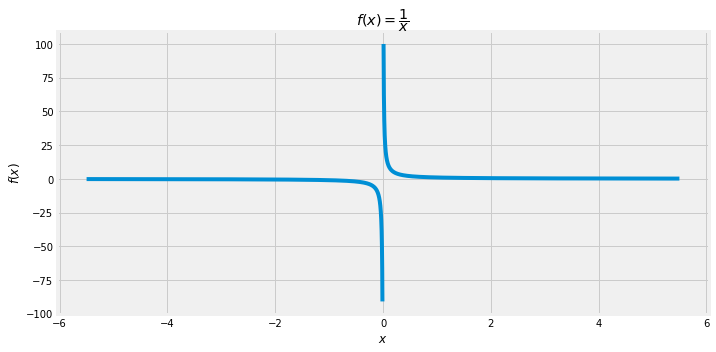

In [3]:
x = np.arange(-5.5,5.5,0.001) 
y = 1/x

y[y > 100] = np.inf
y[y< -100] = -np.inf

par = [{'title':'$f(x) = \dfrac{1}{x}$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)

graf.plot(x=x, y=y, par={'label':'Modelo logístico'})
graf.show()

**Observaciones**

- Se nota que cuando $x=0$ la función $f(x) =  1/x$ no está definida. 

- Si caminamos por la gráfica, de derecha a izquierda, iniciando por ejemplo en $x=4$, conforme nos acercamos al cero el valor de $f(x)$ se hace muy grande: se dice que *tiende a infinito*; en términos matemáticos escribimos:

$\displaystyle
\lim_{x^+ \rightarrow 0} \frac{1}{x} = \infty
$

- Por otro lado, si ahora caminamos de izquierda a derecha hacia $x = 0$ veremos que $f(x)$ decrece hacia $-\infty$, en términos matemáticos:

$\displaystyle
\lim_{x^- \rightarrow 0} \frac{1}{x} = -\infty
$

- De las dos observaciones anteriores se concluye:

$\displaystyle
\lim_{x^+ \rightarrow 0} \frac{1}{x} \neq \lim_{x^- \rightarrow 0} \frac{1}{x}
$

es decir, el límite por la derecha y el límite por la izquierda no son iguales. Véase el siguiente notebook para más detalles sobre límites.

- La función $f(x)$ es discontinua en $x=0$ (de hecho no está bien definida en $x=0$).

## Algunas definiciones

Parece ser anormal ver el comportamiento de las dos funciones anteriores, ya que están desconectadas. A aquellas funciones que no presentan esas 'anormalidades' se les conoce como funciones continuas. 

De manera intuitiva, si quisieramos dibujar la gráfica de una función continua usando un lápiz, en principio lo podemos hacer de un solo trazo, sin despegar el lápiz del papel. Este no es el caso de los ejemplos que hemos revisado. 


Supongamos una función $f(x)$ tiene el valor $y_p$ en $x = p$, decimos que $f$ es continua en $p$, si en cada punto $x$ que está próximo a $p$, el valor de la función $f(x)$ es también próximo a $f(p)$. Pero ¿qué signfica en este contexto el término "próximo a"?

Otro modo de expresar la continuidad es como sigue: Si $x$ se mueve hacia $p$, el correspondiente valor de la función $f(x)$ debe llegar a ser tan próximo a $f(p)$ como se desee, cualquiera que sea la forma con que $x$ se acerque a $p$. En los valores de una función continua no se presentan saltos bruscos.

Por lo tanto, podemos definir:

Una función $f$ es **continua** en un punto $p$ si y sólo si:

1. $\displaystyle \lim_{x \to p}f(x)=f(p)$
2. $f$ está definida en $p$

Más formalmente: 

***
Una función $f$ es **continua** en $p$ si para todo $\epsilon > 0$ existe un $\delta > 0$ tal que $|f(x)-f(p)| < \epsilon$
siempre que $0 < |x - p| < \delta$.
***

### Ejemplo 2. 

Sea $f(x) = x^2$. Vamos a demostrar formalmente que $f$ es continua en $x=1$:
 
Primero notemos que $f$ está definida en $x=1$, pues como mencionamos anteriormente, asumimos que, salvo especificar lo contrario, nuestras funciones tendrían tanto al dominio como al contradominio a $\mathbb{R}$; y entonces $f(2) = 1^2=1$. Ahora bien, para probar la continuidad de $f$ en $x=1$, usando la definición tenemos que demostrar que $\lim_{x \to p}f(x)=f(p)$.

P.D. Para todo $\epsilon>0$ existe $\delta>0$ tal que si $0 < |x - 1|< \delta $, entonces $|x^2-1|<\epsilon$. Encontrar $\delta$ se logra más fácilmente trabajando hacia atrás. Manipulemos la segunda desigualdad que involucra a $\delta$ hasta que contenga un término de la forma $x-1$ como en la primera desigualdad:

$|x^2-1|=|x+1||x-1|$.

En lo anterior, hay un factor no deseado de $|x+1|$, que debe limitarse. Si nos aseguramos de que $\delta < 1$, entonces $|x-1| < \delta < 1$. Luego:

$|x-1| < \delta \Rightarrow |x-1| < 1 \Rightarrow -1 < x-1 < 1$. 

Sumando un 2 atodos los lados de la desigualdad anterior, obtenemos que:

$1 < x+1 < 3 \Rightarrow |x+1| < 3$. 

Por lo tanto, si $|x^2-1|=|x+1||x-1|< 3|x-1|<\epsilon \Rightarrow |x-1|< \frac{\epsilon}{3}$

Entonces, seleccionamos  $\delta=min\{1,\frac{\epsilon}{3}\}$

.

Checamos: Dada $\epsilon>0$, sea $\delta=min\{1,\frac{\epsilon}{3}\}$. Entonces $0<|x-1|<\delta$ implica que 
$|x^2-1|=|x+1||x-1|< 3 |x-1| < 3 \delta \leq 3\frac{\epsilon}{3}=\epsilon$.

$\therefore$ $\lim_{x \to 1}x^2=1=(1)^2$, lo cual quiere decir que $f$ es continua en $x=1$.

Además, se puede ver la siguiente figura la continuidad de esta función en dicho punto:



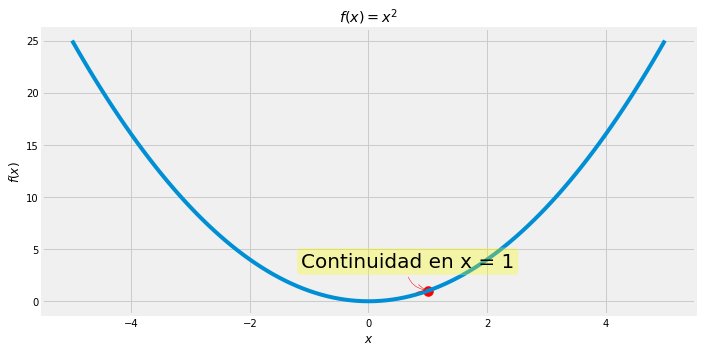

In [32]:
x4 = np.arange(-5, 5.1, 0.1) 
y4 = [i**2 for i in x4]

par = [{'title':'$f(x) = x^2$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
graf.plot(x=x4,y=y4)
graf.scatter(x=[1.],y=[1.],par={'c':'red','marker':'o','s':100})
graf.annotate(par={'s':'Continuidad en x = 1', 'xy':(1, 1), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'red'}})

graf.show()




 **Teorema** Sean f y g dos funciones continuas, es decir, son tales que
$\lim_{x \to p}f(x)=f(p)$ y $\lim_{x \to p}g(x)=g(p)$. Se tiene entonces
1. Si $f$ es una función constante $k$, se cumple que $\lim_{x \to p}f(x) =\lim_{x \to p}k = k = f(p)$
2. $\lim_{x \to p}f(x) + g(x) = f(p)+g(p)$.
3. $\lim_{x \to p}f(x) - g(x) = f(p)-g(p)$.
4. $\lim_{x \to p}f(x) \cdot g(x) = f(p) \cdot g(p)$.
5. Si $g(p) \neq 0$, se cumple que $\lim_{x \to p}\frac{f(x)}{g(x)} = \frac{f(p)}{g(p)}$.

**Teorema** Sean f y g dos funciones continuas en $g(p)$ y en $p$ respectivamente. Se tiene entonces que $ f \circ g$ es continua en $p$. Nóótese que se requiere que $f$ sea continua  en $g(p)$, pero no necesariamente tiene que serlo en $p$.


Los teoremas mostrados en este notebook se refieren a continuidad de funciones en un punto, pero el concepto de continuidad no empieza a ser interesante hasta que dirigimos nuestra atención a funciones que son continuas en todos los puntos de un intervalo. Sea $f$ continua en $x$, para todo $x$ en $(a,b)$, entonces se dice que $f$ es **continua** en $(a,b)$. La continuidad en un intervalo cerrado se define de modo más peculiar:

Una función $f$ se dice que es continua en  $[a,b]$ si y sólo si:

1. $f$ es continua en $x$ para todo $x$ en $(a,b)$, y
2. $\lim_{x \to p^+}f(x) = f(p)$ y $\lim_{x \to p^-}f(x) = f(p)$

**Teorema** Sea $f$ una función continua en $a$, y $f(a) > 0$. Entonces existe un número $\delta > 0$ tal que $f(x)>0$ para todo $x$ que satisface $|x-a| < \delta$. Análogamente, si $f(a) < 0$, entonces existe un número $\delta > 0$ tal que $f(x) < 0$ para todo $x$ que satisface $|x-a| < \delta$

**Teorema de intercalación** Sea $I$ un intervalo que contiene al punto $p$ y sean $f, g$ y $h$ funciones continuas en $I$. Supongamos que, para todo $x$ en $I$ y diferente de $p$, tenemos: $g(x)\leq f(x)\leq h(x)$; y supongamos también que: $g(p)=\lim _{x \to p}g(x)=\lim _{x\to p}h(x)=h(p)$. Entonces: $\lim _{x\to p}f(x)=f(p)=g(p)=h(p)$




## Tres Teoremas Fuertes 





**Teorema 1 (Valor Intermedio)** Si $f$ es continua en $[a,b]$ y $f(a)< c < f(b)$ ($f(a) > c > f(b)$), entonces existe algún $x \in [a,b]$ tal que $f(x) = c$.

Esto quiere decir que la gráfica de una función continua que empieza por debajo de la recta constante $y=c$  (Por arriba) y termina por encima de esta (o por debajo de esta) , entonces $f$ debe cruzar a esta recta en algún punto.

Podemos generalizar este teorema al siguiente:

**Teorema de los valores intermedios** Sea $f$ una función continua en $[a,b]$. Si $c$ y $d$ están en $[a,b]$, entonces $f$ toma todos los valores comprendidos entre $f(c)$ y $f(d)$.

### Ejemplo 3.

Demuestra que la función: $f(x) = x^3 - x^2 + x + 1$ tiene una raíz en el intervalo $[-1,1]$.

Para eso vamos a aplicar el teorema del valor intermedio. Dado que la función polinomial es continua en todo el conjunto de los números reales, si $N = f(x_0) = 0$ para algún $x_0$ que está en el intervalo $[-1,1]$, hacemos $a = -1$ y $b = 1$, y evaluamos la función en esos puntos:

$f(-1) = (-1)^3 - (-1)^2 + (-1) + 1 = -2 < 0$ 

$f(1) = (1)^3 - (1)^2 + (1) + 1 = 2 > 0$

Por lo que satisface con la condición de que $f(a) \leq k \leq f(b)$. Entonces, por la continuidad de la función, debe existir un número $x_0$ en el intervalo $[a,b]$ tal que $f(x_0) = k = 0$

A continuación mostramos la gráfica de la esta función. 

**Ejercicio** ¿Es posible encontrar el $x_0$ que satisface: $f(x_0) = 0$? En caso afirmativo, indique cómo. En caso negativo, explique el proqué.

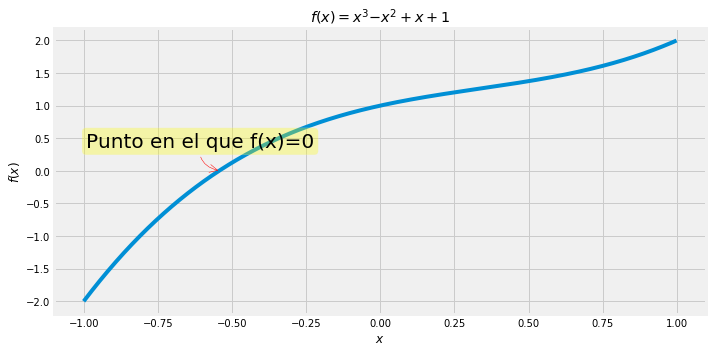

In [33]:
x10 = np.arange(-1, 1, 0.001) 

y10 = [x**3-x**2+x+1 for x in x10]

par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
graf.plot(x=x10,y=y10)
graf.annotate(par={'s':'Punto en el que f(x)=0', 'xy':(-0.54, 0), 'xytext':(-20,20), 'fontsize':20,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'red'}})
graf.show()
                 

**Teorema 2** Si $f$ es continua en $[a,b]$ entonces existen números $N_1,N_2$ tales que $N_1 \le f(x) \le N_2$, para toda $x$ en $[a,b]$. Esto es, $f$ está acotada superiormente e inferiormente en $[a,b]$. Más aún, podemos decir que existe un número $N$ tal que $|f(x)|\leq N$, para todo $x$ en $[a,b]$, es decir, podemos tomar a $N = max\{|N_1|,|N_2|\}$

Esto quiere decir que la gráfica de una función continua queda por debajo y por arriba de algunas rectas paralelas al eje $X$.



### Ejemplo 4.

Usando la función del ejemplo anterior, vimos que $f(-1) =-2$ y $f(1)=2$. Por lo tanto, podemos proponer cualquier número $N$ mayor a dos, digamos $N=3$, de tal forma que dicha función esté acotada inferior y superiormente en $[-1,1]$.

Lo podemos visualizar en la siguiente figura:


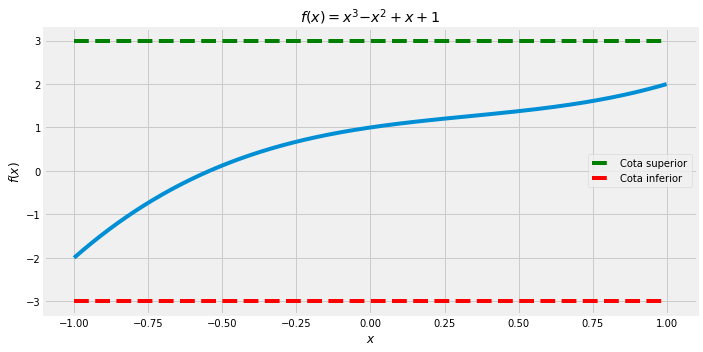

In [35]:
par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
graf.plot(x=[-1,1],y = [3,3], par = {'c':'green','linestyle':'--','label' : 'Cota superior'})
graf.plot(x=[-1,1],y = [-3,-3], par = {'c':'red','linestyle':'--','label' : 'Cota inferior'})
graf.plot(x=x10,y=y10)
graf.legend()
graf.show()

**Teorema 3 (de los valores extremos)** Si $f$ es continua en $[a,b]$ entonces existen números $y,z$ en $[a,b]$ tal que $f(y) \le f(x) \le f(z)$ para toda $x$ en $[a,b]$. 

Esto quiere decir que una función continua en un intervalo cerrado alcanza su mínimo y su máximo en dicho intervalo.



### Ejemplo 5. 

Una vez más, consideremos la función $f(x) = x^3 - x^2 + x + 1$. Sabemos que $f$ es continua en [-1,1], por lo que según el teorema anterior, alcanza su máximo y su mínimo.

1. Entonces, Dado que $f(x)$ es continua, alcanzará un valor máximo y mínimo en algún punto del intervalo de $x = -1$ a $x = 3$ (así lo dice el teorema). Dado que la función es un polinomio, no habrá ser picos agudos o discontinuidades que preocuparse.

2. Encuontramos la derivada, la igualamos a cero y despejamos x. Luego encuentra el valor $f(x)$ en esa $x$:

$f'(x) = 3x^2 - 2x + 1  \Rightarrow 3x^2 - 2x + 1 = 0 $ Sin embargo, no podemos continuar, pues las raíces de este último polinomio de segundo grado son raíces complejas.


3. Verifique los puntos extremos. Esto significa valuar $f(-1)$ y $f(1)$. Y obtuvimos que $f(-1)=-2$ y $f(1)=2$, lo cual quiere decir que $y=-1$ y $z=1$ son los puntos en los que $f(x)$ alcanza su mínimo y su máximo respectivamente.



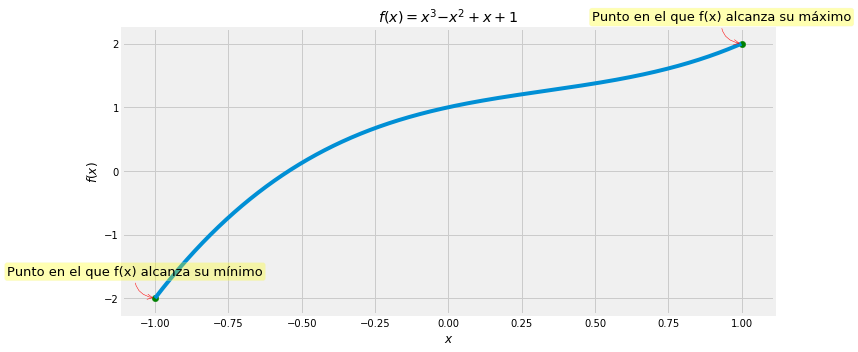

In [36]:
par = [{'title':'$f(x) = x^3−x^2+x+1$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
graf.plot(x=x10,y=y10)
graf.annotate(par={'s':'Punto en el que f(x) alcanza su máximo', 'xy':(1, 2), 'xytext':(-20,20), 'fontsize':13,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops': {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'red'}})
graf.scatter(x=[1.],y=[2.],par={'c':'green','marker':'o','s':40})
graf.annotate(par={'s':'Punto en el que f(x) alcanza su mínimo', 'xy':(-1, -2), 'xytext':(-20,20), 'fontsize':13,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops': {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                            'color':'red'}})
graf.scatter(x=[-1.],y=[-2.],par={'c':'green','marker':'o','s':40})
graf.show()

### Ejemplo 6: aplicación.


Suponga que un vendedor recibe un salario de acuerdo con un contrato que establece una relación entre el pago y el nivel de ventas realizadas por el vendedor. En particular, suponga que el contrato estipula que el salario mensual del vendedor estará compuesto de tres partes: 

$(i)$ una cantidad básica de $\$800$, 

$(ii)$ una comisión del $10\%$, y 

$(iii)$ un bono de suma global de $\$500$ si las ventas del vendedor para el mes alcanzan o exceden los $\$20,000$. 

A partir de esta descripción, se puede ver que su salario aumentará en $\$500$ si se alcanza el nivel crítico de $\$20,000$ en ventas. Esto implica una discontinuidad en su horario salarial. Si $S$ representa las ventas por mes y $P$ representa el salario del vendedor por el mes, se sigue que la función que describe su relación salario-ventas es:

$   P(S) = \left\{
\begin{array}{l}
      \$800+0.1\cdot S & S<\$20.000 \\
      \
      \\
      \$1,300+0.1\cdot S & S \ge \$20.000. \\
\end{array} 
\right.$


El hecho de que el bono de $\$500$ se logre una vez que $S$ alcanza el valor crítico de $\$20,000$ conduce al resultado de que el límite izquierdo de la función salarial en $S = \$20,000$ es $\$2,800$ mientras que el límite derecho es de $\$3,300$. La existencia de esta discontinuidad tiene implicaciones económicas interesantes. Considere el siguiente escenario. Hay tres vendedores, llamados $A$, $B$ y $C$. Sus ventas acumuladas para el mes, sin incluir el último día, son $\$26,000$ para A, $\$18,500$ para $B$ y $\$6,000$ para $C$. La comisión del $10\%$ sobre las ventas le dará a cada uno un incentivo similar para realizar ventas adicionales el último día del mes. ¿Pero la posibilidad del bono de $\$500$ tendrá un efecto diferente en los tres vendedores? Asumiendo que es posible generar ventas por valor de unos pocos miles de dólares en un día, pero es prácticamente imposible crear más de $\$10,000$ en ventas, uno esperaría que el vendedor $B$ se esforzará más el último día para aumentar las ventas que los otros dos. 

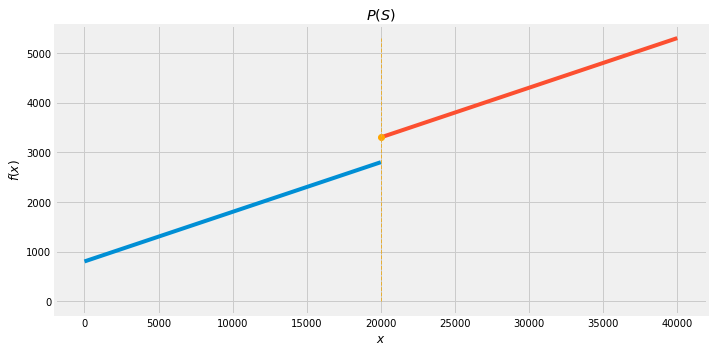

In [39]:
def P(s):
    if(s < 20000): return 800+0.1*s
    else: return 1300+0.1*s

s1 = np.arange(0., 20000., 10)
s2 = np.arange(20000., 40000., 10)

p1 = []
p2 = []
for i in range(len(s1)):
   p1.append(P(s1[i]))
  
for i in range(len(s2)):
   p2.append(P(s2[i]))

par = [{'title':'$P(S)$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)

graf.plot(x=s1, y=p1)
graf.plot(x=s2, y=p2)
graf.plot(x=[20000], y=[3300],par={'marker':"o",'color':'orange'})
graf.plot(x=[20000,20000],y=[0,5300],par={'linestyle':"--", 'linewidth':'1'})
graf.show()

## Referencias



* Spivak, M., Cálculo Infinitesimal ($2^{a}$ ed.). México: Reverté, 1998.
* Apostol, T. M., Calculus, Volumen I. México: Ed. Reverté S. A., 2001.
* Hoy, M., Livernois, J., McKenna, C., Rees, R.,Stengos, T., Mathematics for Economics ($3^{a}$ ed.). Massachusetts: Massachusetts Institute of Technology, 2011.